In [1]:
import json

import pandas as pd
import matplotlib.pyplot as plt
from obspy import core
from obspy.core import utcdatetime
from obspy.core.utcdatetime import UTCDateTime


In [2]:
def load_data(cfg):
    # select reference file depending on number of source files
    # src_file = (cfg['tools'] + 'p_picker_reference--012.csv')
    # src_file = (cfg['tools'] + 'p_picker_reference--030.csv')
    src_file = (cfg['tools'] + 'p_picker_reference.csv')

    df_src = pd.read_csv(src_file, sep='\t', index_col=False, header=None)

    ref = []
    event = {}

    for row in [df_src.iloc[i] for i in range(0, len(df_src))]:
        if row[1] != 'P':
            ref.append(event)
            event = {
                'time' : UTCDateTime(row[1]),
                # 'x'    : row[2],
                # 'y'    : row[3],
                # 'z'    : row[4],
                # 'mag'  : row[5],
                'id'   : row[6].replace('smi:local/event/', ''),
                'picks': {},
                }
        else:
            event['picks'][int(row[4].replace('R', ''))] = UTCDateTime(row[2])

    ref.append(event)

    # delete empty first element
    ref = ref[1:]

    for i in range(0, len(ref)):
        ref[i]['average'] = utf_average(ref[i])
    return ref

In [3]:
main_dir = '/home/1/dev/proj/dugseis/devel/processing/analysis/p_picker/'
file = 'output/12-sourcefiles/3.0_1.5_7_180/details_3.0_1.5_7_180.json'

with open(main_dir + file, 'r') as read_file:
    det = json.load(read_file)

In [4]:
len([d for d in det])

146

In [5]:
matchings = [d['time_diff'] for d in det if d['match'] == 'OK']
[m for m in matchings if m >= 0]

[]

In [6]:
len([d for d in det if d['match'] == 'OK'])

96

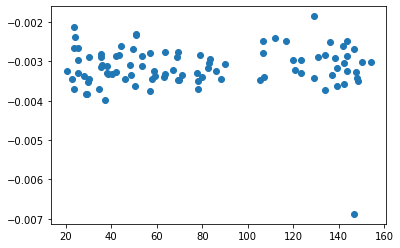

In [7]:
ref_times = [d['ref_time']  for d in det if d['match'] == 'OK']
diffs     = [d['time_diff'] for d in det if d['match'] == 'OK']
fig, ax = plt.subplots()
plt.plot(ref_times, diffs, 'o')
plt.show()

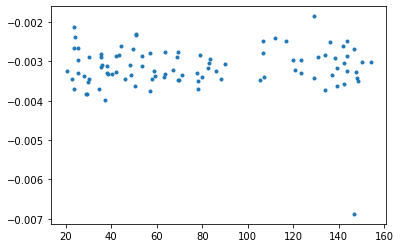

In [8]:
plt.plot(ref_times, diffs, 'o', markersize=3)
plt.show()